# 一、锯齿波的傅里叶展开

In [2]:
# inline 模式下，matplotlib 绘制的图会直接输出到 notebook 内
# 但是 inline 模式有很多缺陷（不支持 animation，不能交互）
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

PI2 = 2*np.pi
PI3 = 3*np.pi
PI4 = 4*np.pi

## 1.1 锯齿波函数的定义与图形
\begin{equation}
        f(x)=
        \begin{cases}
            \frac{1}{2}(\pi - x) & 0 < x \leq 2 \pi \\
            f(x + 2 \pi) & \text{otherwise}
        \end{cases}
    \end{equation}

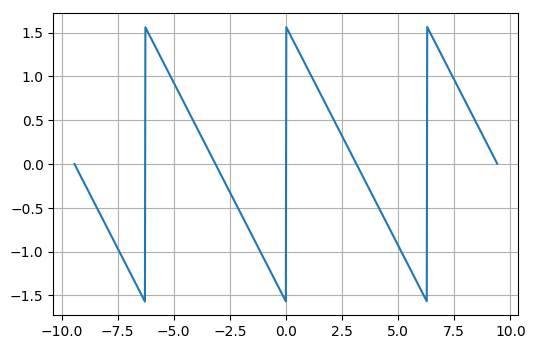

In [3]:
# 锯齿波图形

def f(x):  # 函数定义
    if x <= 0:
        return f(x + PI2)
    elif x > 2*np.pi:
        return f(x - PI2)
    else:
        return 1/2 * (np.pi - x)

X = np.arange(-PI3, PI3, 0.02)  # x 范围
Y = list(map(f, X))             # 计算对应的 y 值

fig, axes = plt.subplots(dpi=100)
axes.grid()
axes.plot(X, Y)    # 绘图

## 1.2 傅里叶展开

这是一个奇函数，展开为正弦级数为 $\sum_{n=1}^{\infty} \frac{\sin nx}{n}$，
下面开始绘制级数叠加过程图

In [4]:
# 这里使用矩阵方法，同时计算 n 项的值。因为这种方式要比单独计算每一项要快。

n_max = 300   # 展开到第 n 项
N = np.arange(1,n_max)
X = np.arange(-PI3, PI3, 0.001)  # x 范围

NX = np.outer(N, X)   # 计算 N 和 X 的外积，所得矩阵的每一行，即为对应 n 值的 nx 向量。

NY = np.array(np.sin(NX) / np.matrix(N).transpose())   # 计算对应的 Y（矩阵），n 应被对应的 sin(nx) 所除，所以 N 需要转置

Serise = np.cumsum(NY, axis=0)  # 计算级数，不是原地计算，因此不会影响到 NY

## 1.3 动画

In [9]:
# 1. 使用 matplotlib 的 animation。略麻烦，但是交互性高。

# backend 切换为 tk，因为 inline 不支持 animation
%matplotlib tk

from matplotlib.lines import Line2D
import matplotlib.animation as animation

fig, (ax1, ax2) = plt.subplots(1, 2, dpi=100)
ax1.grid()
ax2.grid()


def animate(Y):
    ax1.plot(X,Y)
    return ax2.plot(X,Y, "black")


ani = animation.FuncAnimation(
    fig, animate, frames=Serise, interval=80, blit=True)

fig.show()

In [7]:
# 2. 使用 jupyterlab 的 ipywidgets 插件进行交互
import ipywidgets as widgets

%matplotlib inline

def update_lines(i):
    # inline 模式下，fig好像是一经显示就不能修改的，因此每次都要创建新的
    fig, axes = plt.subplots(dpi=150)
    axes.grid()
    axes.plot(X, Serise[i], 'red')
    
widgets.interact(update_lines, i=(1,100,1))

interactive(children=(IntSlider(value=50, description='i', min=1), Output()), _dom_classes=('widget-interact',…

<function __main__.update_lines(i)>